# Expected Threat Average 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
spain_events=pd.read_csv('spain_events.csv')

In [98]:
x_divisions=np.linspace(0,105,7)
x_divisions=np.around(x_divisions,decimals=2)
y_divisions=np.linspace(0,68,4)
y_divisions=np.around(y_divisions,decimals=2)

In [99]:
zones = np.arange(0,((len(x_divisions)-1)*(len(y_divisions)-1)))
zones = np.reshape(zones,((len(x_divisions)-1),(len(y_divisions)-1)))

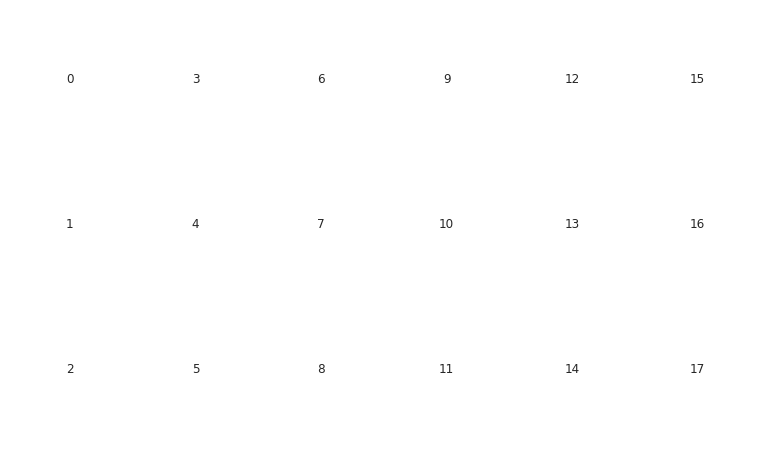

In [547]:
fig ,ax = plt.subplots(figsize=(13.5,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(zones.T , vmin=0, vmax=10000,annot=True,annot_kws={"size": 12},cmap=cmap,fmt='.0f', linewidths=0.25,xticklabels=False,yticklabels=False,cbar=False)
plt.savefig('zones18.png')

The zones as they are spread out on our hypothetical football field

In [452]:
def assign_zone(x_coord,y_coord):
    for i in range(len(x_divisions)-1):
        if x_coord < x_divisions[i+1]:
            break
    for j in range(len(y_divisions)-1):
        if y_coord < y_divisions[j+1]:
            break
    return i, j

In [453]:
m = len(spain_events)
zone1=np.zeros(m)
for i in range(m):
    a , b = assign_zone(spain_events['x_coord1'][i],spain_events['y_coord1'][i])
    zone1[i] = zones[a][b]
zone2=np.zeros(m)
for i in range(m):
    a , b = assign_zone(spain_events['x_coord2'][i],spain_events['y_coord2'][i])
    zone2[i] = zones[a][b]

In [454]:
spain_events['zone1']=zone1
spain_events['zone2']=zone2

In [455]:
Transition_matrix_ave = np.zeros((len(zones)*len(zones[0]),len(zones)*len(zones[0])))

In [456]:
spain_tr = spain_events.loc[(spain_events['eventId']==8)|(spain_events['eventId']==10)]
zones_tr = zones.flatten()

In [457]:

for i in zones_tr:
    for j in zones_tr:
        temp1 = spain_tr.loc[(spain_tr['zone1']==i)&(spain_tr['eventId']==8)]
        denom = len(temp1)
        nume = len(temp1.loc[(temp1['zone2']==j)&(temp1['is_accurate']==1)])
        if denom==0:
            Transition_matrix_ave[i][j] = 0
        else:
            Transition_matrix_ave[i][j]=nume/denom

In [458]:
Transition_matrix_ave=np.around(Transition_matrix_ave,decimals=2)

In [459]:
move_prob_ave=np.zeros(len(zones)*len(zones[0]))
for i in zones_tr:
    temp1 = spain_tr.loc[(spain_tr['zone1']==i)]
    denom = len(temp1)
    nume = len(temp1.loc[(temp1['eventId']==8)])
    if denom==0:
        move_prob_ave[i]==0
    else:
        move_prob_ave[i]=nume/denom

In [460]:
move_prob_ave=np.around(move_prob_ave, decimals=2)

In [461]:
goal_prob_ave = np.zeros(6*3)
shot_prob_ave = np.zeros(6*3)
for i in zones_tr:
        temp1 = spain_tr.loc[(spain_tr['zone1']==i)]
        denom = len(temp1)
        nume = len(temp1.loc[temp1['eventId']==10])
        if denom==0:
            shot_prob_ave[i] = 0
        else:
            shot_prob_ave[i]=nume/denom
        nume2 = len(temp1.loc[(temp1['eventId']==10)&(temp1['is_goal']==1)])
        if nume==0:
            goal_prob_ave[i]= 0 
        else:
            goal_prob_ave[i]=nume2/nume

In [462]:
shot_prob_ave=np.around(shot_prob_ave, decimals=2)
goal_prob_ave=np.around(goal_prob_ave, decimals=2)

In [463]:
xT_ave = np.zeros(len(move_prob_ave))
iterations = 5
for k in range(iterations):
    xTtemp = xT_ave
    for i in range(len(xT_ave)):
        pass_payoff = 0
        for j in range(len(xT_ave)):
            pass_payoff += Transition_matrix_ave[i,j]*xT_ave[j]
        xTtemp[i] = move_prob_ave[i]*pass_payoff + shot_prob_ave[i]*goal_prob_ave[i]
    xT_ave = xTtemp

In [464]:
xTfinal_ave = xT_ave.reshape((6,3))

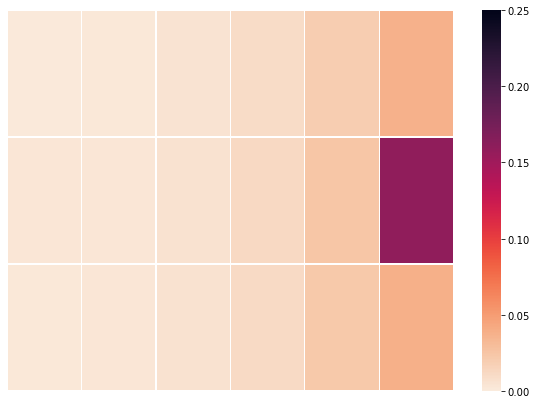

In [465]:
fig ,ax = plt.subplots(figsize=(10,7))
sns.heatmap(xTfinal_ave.T , vmin=0, vmax=0.25, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False)
plt.xlim([0,6])
plt.ylim([0,3])
ax.invert_yaxis()

xT of each zone visualised

# Expected Threat of Individual Teams

In [467]:
def generatexTmatrix(spain_events,Id,zones,iterations):
    Transition_matrix = np.zeros((len(zones)*len(zones[0]),len(zones)*len(zones[0])))
    team_tr = spain_events.loc[(spain_events['teamId']==Id)&((spain_events['eventId']==8)|(spain_events['eventId']==10))]
    zones_tr = zones.flatten()
    for i in zones_tr:
        for j in zones_tr:
            temp1 = team_tr.loc[(team_tr['zone1']==i)&(team_tr['eventId']==8)]
            denom = len(temp1)
            nume = len(temp1.loc[(temp1['zone2']==j)&(temp1['is_accurate']==1)])
            if denom==0:
                Transition_matrix[i][j] = 0
            else:
                Transition_matrix[i][j]=nume/denom
    Transition_matrix=np.around(Transition_matrix,decimals=2)
    move_prob=np.zeros(len(zones)*len(zones[0]))
    for i in zones_tr:
        temp1 = team_tr.loc[(team_tr['zone1']==i)]
        denom = len(temp1)
        nume = len(temp1.loc[(temp1['eventId']==8)])
        if denom==0:
            move_prob[i]==0
        else:
            move_prob[i]=nume/denom
    move_prob=np.around(move_prob, decimals=2)
    goal_prob = np.zeros(6*3)
    shot_prob = np.zeros(6*3)
    for i in zones_tr:
        temp1 = team_tr.loc[(team_tr['zone1']==i)]
        denom = len(temp1)
        nume = len(temp1.loc[temp1['eventId']==10])
        if denom==0:
            shot_prob[i] = 0
        else:
            shot_prob[i]=nume/denom
        nume2 = len(temp1.loc[(temp1['eventId']==10)&(temp1['is_goal']==1)])
        if nume==0:
            goal_prob[i]= 0 
        else:
            goal_prob[i]=nume2/nume
    shot_prob=np.around(shot_prob, decimals=2)
    goal_prob=np.around(goal_prob, decimals=2)
    xT = np.zeros(len(move_prob))
    iterations = iterations
    for k in range(iterations):
        xTtemp = xT
        for i in range(len(xT)):
            pass_payoff = 0
            for j in range(len(xT)):
                pass_payoff += Transition_matrix[i,j]*xT[j]
            xTtemp[i] = move_prob[i]*pass_payoff + shot_prob[i]*goal_prob[i]
        xT = xTtemp
    xT=np.around(xT, decimals=4)
    xT = xT.reshape((6,3))
    return xT,Transition_matrix,move_prob,shot_prob,goal_prob
    
            
    
    

In [468]:
xT_barca,Transition_matrix_barca,move_prob_barca,shot_prob_barca,goal_prob_barca = generatexTmatrix(spain_events,676,zones,5)

In [469]:
xT_valencia,Transition_matrix_valencia,move_prob_valencia,shot_prob_valencia,goal_prob_valencia = generatexTmatrix(spain_events,674,zones,5)

In [470]:
xT_realmadrid,Transition_matrix_realmadrid,move_prob_realmadrid,shot_prob_realmadrid,goal_prob_realmadrid = generatexTmatrix(spain_events,675,zones,5)

In [471]:
xT_villareal,Transition_matrix_villareal,move_prob_villareal,shot_prob_villareal,goal_prob_villareal = generatexTmatrix(spain_events,682,zones,5)

In [472]:
xT_atm,Transition_matrix_atm,move_prob_atm,shot_prob_atm,goal_prob_atm = generatexTmatrix(spain_events,679,zones,5)

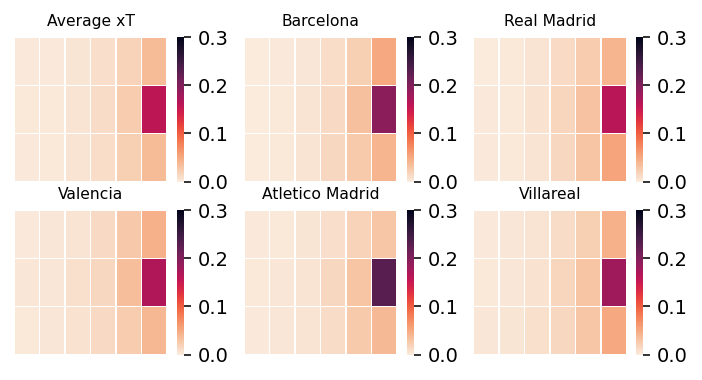

In [475]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
sns.heatmap(xTfinal_ave.T , vmin=0, vmax=0.30, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Average xT', fontsize=8)
sns.heatmap(xT_barca.T , vmin=0, vmax=0.30,cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Barcelona', fontsize=8)
sns.heatmap(xT_realmadrid.T , vmin=0, vmax=0.30, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,2])
axes[0,2].set_title('Real Madrid', fontsize=8)
sns.heatmap(xT_valencia.T , vmin=0, vmax=0.30, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,0])
axes[1,0].set_title('Valencia', fontsize=8)
sns.heatmap(xT_atm.T , vmin=0, vmax=0.30, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,1])
axes[1,1].set_title('Atletico Madrid', fontsize=8)
sns.heatmap(xT_villareal.T , vmin=0, vmax=0.30, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,2])
axes[1,2].set_title('Villareal', fontsize=8)
plt.savefig('xT_teams.png')


In [476]:
xT_barca_diff = xT_barca - xTfinal_ave
xT_realmadrid_diff = xT_realmadrid - xTfinal_ave
xT_atm_diff = xT_atm - xTfinal_ave
xT_villareal_diff = xT_villareal - xTfinal_ave
xT_valencia_diff = xT_valencia - xTfinal_ave

In [477]:
shot_prob_barca_diff = shot_prob_barca-shot_prob_ave 
shot_prob_realmadrid_diff = shot_prob_realmadrid-shot_prob_ave 
shot_prob_atm_diff =shot_prob_atm-shot_prob_ave
shot_prob_villareal_diff = shot_prob_villareal-shot_prob_ave
shot_prob_valencia_diff = shot_prob_valencia-shot_prob_ave 

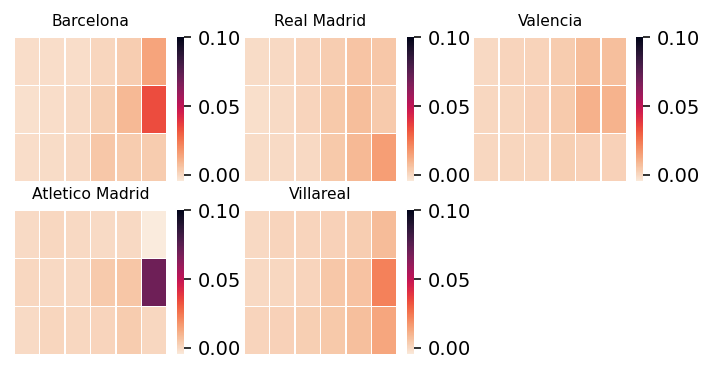

In [478]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
# sns.heatmap(xTfinal_ave.T , vmin=0, vmax=0.25, cmap="YlGnBu", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
# axes[0,0].invert_yaxis()
# axes[0,0].set_title('Average xT', fontsize=8)
sns.heatmap(xT_barca_diff.T , vmin=-0.005, vmax=0.1,cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Barcelona', fontsize=8)
sns.heatmap(xT_realmadrid_diff.T , vmin=-0.005, vmax=0.1, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Real Madrid', fontsize=8)
sns.heatmap(xT_valencia_diff.T , vmin=-0.005, vmax=0.1, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,2])
axes[0,2].set_title('Valencia', fontsize=8)
sns.heatmap(xT_atm_diff.T , vmin=-0.005, vmax=0.1, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,0])
axes[1,0].set_title('Atletico Madrid', fontsize=8)
sns.heatmap(xT_villareal_diff.T , vmin=-0.005, vmax=0.1, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,1])
axes[1,1].set_title('Villareal', fontsize=8)
fig.delaxes(axes[1,2])
plt.savefig('xT_teams_diff.png')


**Atletico Madrid creates more threat than average in front of the goal whereas Real Madrid is slightly more efficient from the right hand side**

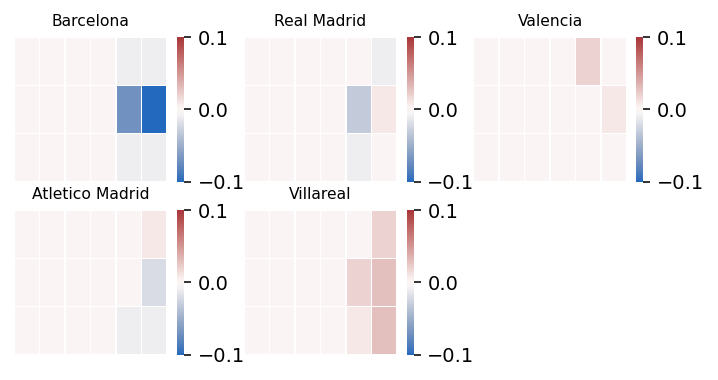

In [479]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
sns.heatmap(np.reshape(shot_prob_barca_diff,(6,3)).T , vmin=-0.1, vmax=0.1,cmap="vlag", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Barcelona', fontsize=8)
sns.heatmap(np.reshape(shot_prob_realmadrid_diff,(6,3)).T , vmin=-0.1, vmax=0.1, cmap="vlag", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Real Madrid', fontsize=8)
sns.heatmap(np.reshape(shot_prob_valencia_diff,(6,3)).T , vmin=-0.1, vmax=0.1, cmap="vlag", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,2])
axes[0,2].set_title('Valencia', fontsize=8)
sns.heatmap(np.reshape(shot_prob_atm_diff,(6,3)).T, vmin=-0.1, vmax=0.1, cmap="vlag", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,0])
axes[1,0].set_title('Atletico Madrid', fontsize=8)
sns.heatmap(np.reshape(shot_prob_villareal_diff,(6,3)).T , vmin=-0.1, vmax=0.1, cmap="vlag", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,1])
axes[1,1].set_title('Villareal', fontsize=8)
fig.delaxes(axes[1,2])
plt.savefig('shots_diff.png')

In [480]:
np.reshape(Transition_matrix_barca[15],(6,3)).T

array([[0.  , 0.  , 0.  , 0.01, 0.23, 0.18],
       [0.  , 0.  , 0.  , 0.  , 0.07, 0.18],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01]])

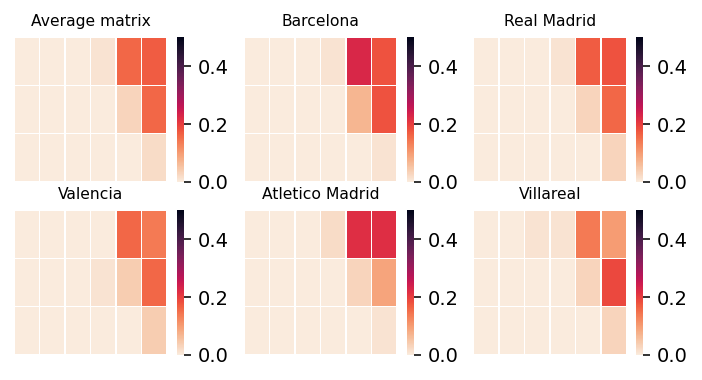

In [481]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
sns.heatmap(np.reshape(Transition_matrix_ave[15],(6,3)).T , vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Average matrix', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_barca[15],(6,3)).T, vmin=0, vmax=0.50,cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Barcelona', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_realmadrid[15],(6,3)).T , vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,2])
axes[0,2].set_title('Real Madrid', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_valencia[15],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,0])
axes[1,0].set_title('Valencia', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_atm[15],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,1])
axes[1,1].set_title('Atletico Madrid', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_villareal[15],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,2])
axes[1,2].set_title('Villareal', fontsize=8)
plt.savefig('transition_example1.png')


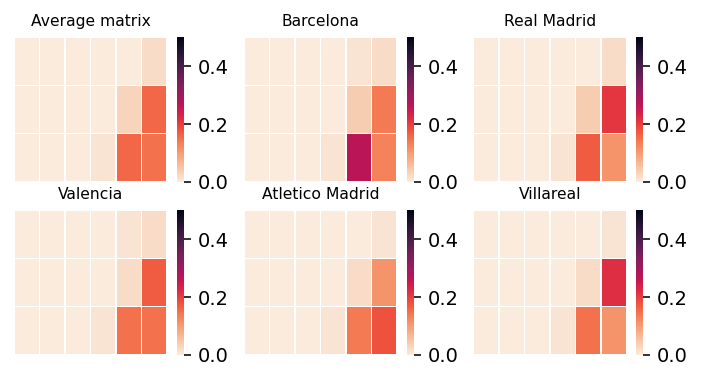

In [482]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
sns.heatmap(np.reshape(Transition_matrix_ave[17],(6,3)).T , vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,0])
axes[0,0].set_title('Average matrix', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_barca[17],(6,3)).T, vmin=0, vmax=0.50,cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,1])
axes[0,1].set_title('Barcelona', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_realmadrid[17],(6,3)).T , vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[0,2])
axes[0,2].set_title('Real Madrid', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_valencia[17],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,0])
axes[1,0].set_title('Valencia', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_atm[17],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,1])
axes[1,1].set_title('Atletico Madrid', fontsize=8)
sns.heatmap(np.reshape(Transition_matrix_villareal[17],(6,3)).T, vmin=0, vmax=0.50, cmap="rocket_r", linewidths=0.25, xticklabels=False,yticklabels=False, ax=axes[1,2])
axes[1,2].set_title('Villareal', fontsize=8)
plt.savefig('transition_example2.png')

# Pass Sonars

In [597]:
def generate_pass_sonar(data,playerId):
    passes=data.loc[(data['playerId']==playerId)&(data['eventId']==8)]
    index = np.arange(0,len(passes),1)
    passes.index=index
    data_a=passes.loc[(passes['y_coord2']-passes['y_coord1'])>0]
    data_b=passes.loc[(passes['y_coord2']-passes['y_coord1'])<=0]
    angles_b=np.asarray(np.arctan((data_b['x_coord2']-data_b['x_coord1'])/(data_b['y_coord1']-data_b['y_coord2']))*180/np.pi)
    for i in range(len(angles_b)):
        if angles_b[i]>=0:
            angles_b[i]=180-angles_b[i]
        else:
            angles_b[i]=np.abs(angles_b[i])+180
    angles_b=np.around(angles_b,decimals=2)
    angles_a=np.asarray(np.arctan((data_a['x_coord2']-data_a['x_coord1'])/(data_a['y_coord2']-data_a['y_coord1']))*180/np.pi)
    for i in range(len(angles_a)):
        if angles_a[i]<0:
            angles_a[i]=angles_a[i]+360
    angles_a=np.around(angles_a,decimals=2)
    angles=np.concatenate((angles_a,angles_b))
    barplot = np.zeros(8)
    for i in range(len(angles)):
        if angles[i]<=45:
            barplot[0]+=1
        elif angles[i]<=90:
            barplot[1]+=1
        elif angles[i]<=135:
            barplot[2]+=1
        elif angles[i]<=180:
            barplot[3]+=1
        elif angles[i]<=225:
            barplot[4]+=1
        elif angles[i]<=270:
            barplot[5]+=1
        elif angles[i]<=315:
            barplot[6]+=1
        elif angles[i]<=360:
            barplot[7]+=1
    sum=np.sum(barplot)
    barplot = (barplot/sum)*100
    barplot=np.around(barplot,decimals=2)
    return barplot

In [628]:
player = generate_pass_sonar(spain_events,3476)

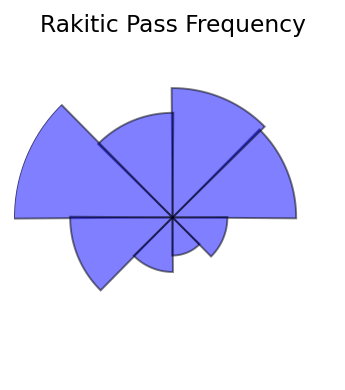

In [629]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
theta=np.arange(22.5,382.5,45)*np.pi/180
width = np.arange(0,405,45)*np.pi/180
upperlimit=np.amax(player)
ax=plt.subplot(111,polar=True)
bars=ax.bar(theta,player,color='blue',edgecolor='black',alpha=0.5)
ax.set_ylim(0,upperlimit)
ax.axis('off')
plt.title('Rakitic Pass Frequency')
plt.savefig('Rakitic_passfreq_sonar.png')

In [645]:
def generate_pass_sonarxT(data,playerId):
    passes=data.loc[(data['playerId']==playerId)]
    index = np.arange(0,len(passes),1)
    passes.index=index
    data_a=passes.loc[(passes['y_coord2']-passes['y_coord1'])>0]
    data_b=passes.loc[(passes['y_coord2']-passes['y_coord1'])<=0]
    xT_a = np.asarray(data_a['xTdifference'])
    xT_b = np.asarray(data_b['xTdifference'])
    angles_b=np.asarray(np.arctan((data_b['x_coord2']-data_b['x_coord1'])/(data_b['y_coord1']-data_b['y_coord2']))*180/np.pi)
    for i in range(len(angles_b)):
        if angles_b[i]>=0:
            angles_b[i]=180-angles_b[i]
        else:
            angles_b[i]=np.abs(angles_b[i])+180
    angles_b=np.around(angles_b,decimals=2)
    angles_a=np.asarray(np.arctan((data_a['x_coord2']-data_a['x_coord1'])/(data_a['y_coord2']-data_a['y_coord1']))*180/np.pi)
    for i in range(len(angles_a)):
        if angles_a[i]<0:
            angles_a[i]=angles_a[i]+360
    angles_a=np.around(angles_a,decimals=2)
    angles=np.concatenate((angles_a,angles_b))
    xT=np.concatenate((xT_a,xT_b))
    barplot = np.zeros(8)
    for i in range(len(angles)):
        if angles[i]<=45:
            barplot[0]+=xT[i]
        elif angles[i]<=90:
            barplot[1]+=xT[i]
        elif angles[i]<=135:
            barplot[2]+=xT[i]
        elif angles[i]<=180:
            barplot[3]+=xT[i]
        elif angles[i]<=225:
            barplot[4]+=xT[i]
        elif angles[i]<=270:
            barplot[5]+=xT[i]
        elif angles[i]<=315:
            barplot[6]+=xT[i]
        elif angles[i]<=360:
            barplot[7]+=xT[i]
#     sum=np.sum(barplot)
#     barplot = (barplot/sum)*100
    barplot=np.around(barplot,decimals=2)
    return barplot

In [659]:
player = generate_pass_sonarxT(pass_events,3346)

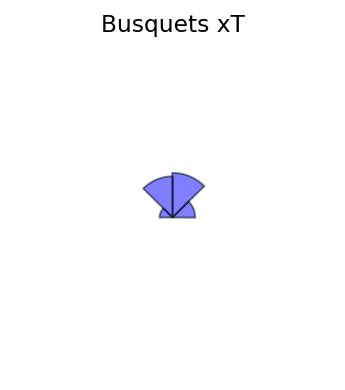

In [660]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize = (6,3), dpi = 140)
theta=np.arange(22.5,382.5,45)*np.pi/180
width = np.arange(0,405,45)*np.pi/180
upperlimit=np.amax(player)
ax=plt.subplot(111,polar=True)
bars=ax.bar(theta,player,color='blue',edgecolor='black',alpha=0.5)
ax.set_ylim(0,12)
ax.axis('off')
plt.title('Busquets xT')
plt.savefig('Busquets_passxT_sonar.png')